<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Assignment5_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import graphviz
import pydot
from io import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

In [ ]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

In [ ]:
# Wine Example

In [ ]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 91 (delta 39), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
wine['quality'] = wine['quality'] > 6
wine['quality'].describe()

count      1599
unique        2
top       False
freq       1382
Name: quality, dtype: object

In [ ]:
np.random.seed(42)
train, test = train_test_split(wine, test_size = 0.5)
val, test = train_test_split(test, test_size = 0.5)
X_train = train.drop(columns = ['quality']).values
y_train = train['quality'].values
X_val = val.drop(columns = ['quality']).values
y_val = val['quality'].values
X_test = test.drop(columns = ['quality']).values
y_test = test['quality'].values

Tree Classifier

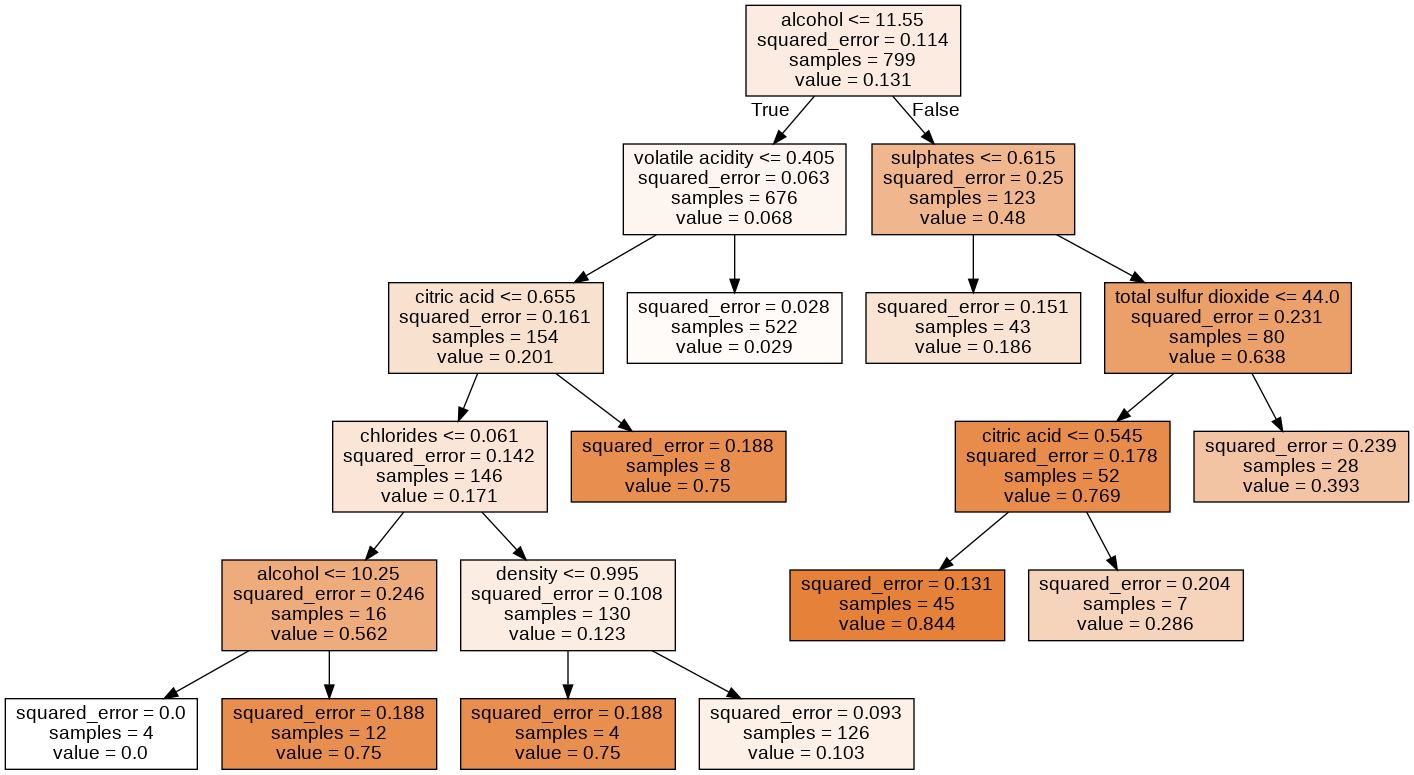

In [ ]:
wine_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
wine_tree.fit(X_train, y_train)
graph, = print_tree(wine_tree, features= train.drop(columns = ['quality']).columns)
Image(graph.create_png())

In [ ]:
wine_tree_preds = wine_tree.predict(X_test)

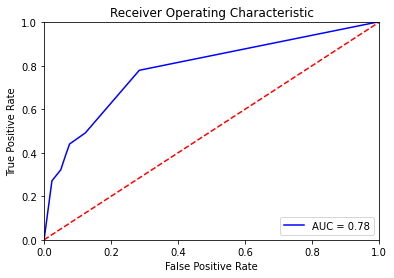

In [ ]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()